Doing basic analysis

In [10]:
from model import read_into_dataframe, extract_data
import matplotlib.pyplot as plt
import pandas as pd

df = read_into_dataframe("./data/bs140513_032310.csv")
df.info()
print(df.head())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     

Drawing some bar graphs allows us to get an idea what variables might indicate fraud

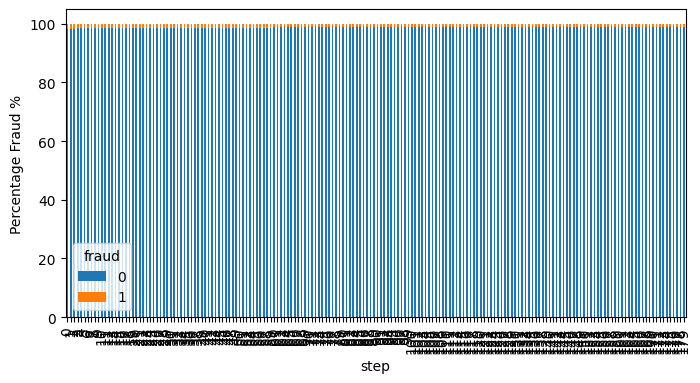

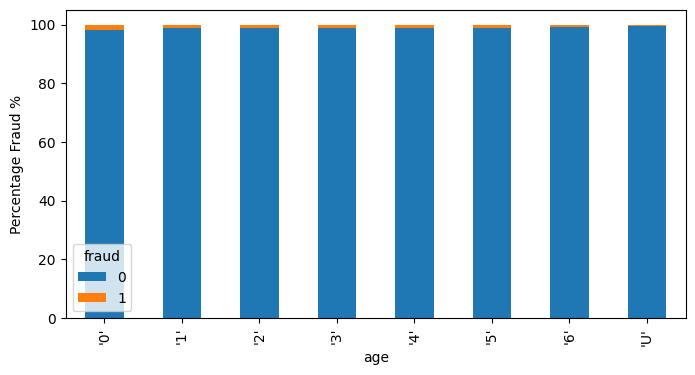

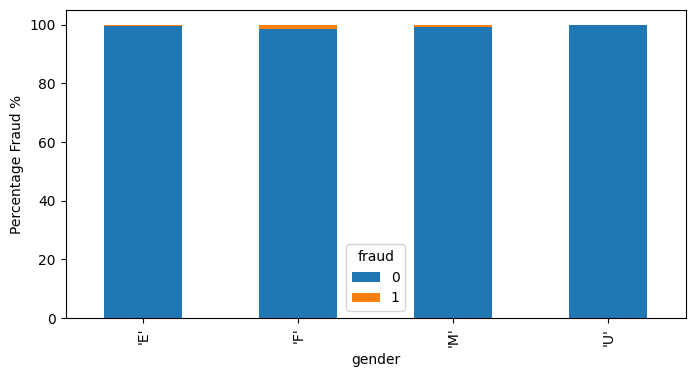

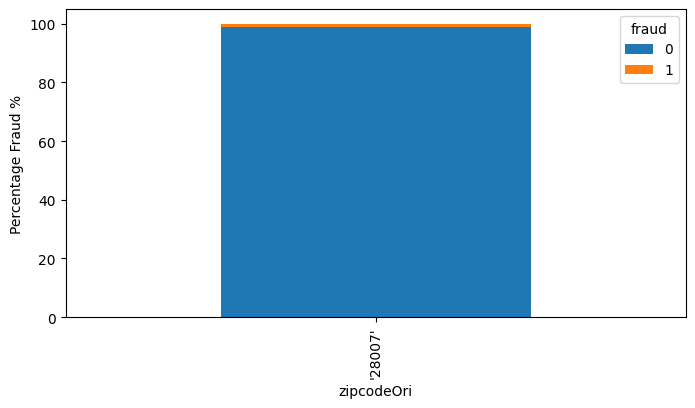

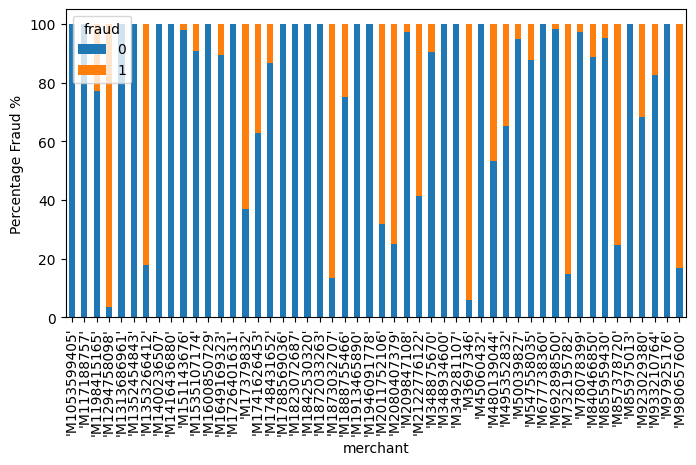

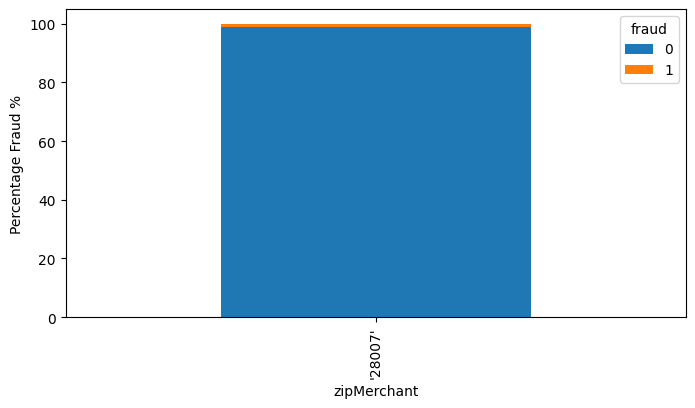

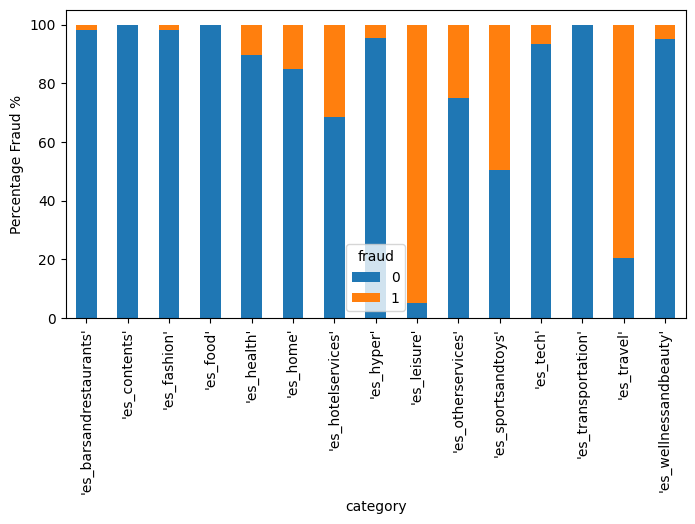

In [11]:
for col in df:
    if col != "fraud" and col != "amount" and col != "customer" and col != "step":
        (pd.crosstab(df[col], df["fraud"],normalize="index")*100).plot(kind="bar",figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Fraud %')

Age should have almost 0 unique fields so we are looking at that.
We can see that there is one U which I am assuming is a  mistake and since it is only one row we will just remove it

In [12]:
print(df["age"].unique())
print(df["step"].min())
df["step"].max()

["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
0


179

Interestingly there are a two other genders 'E' and 'U' but in much lower proportion then 'F' an 'M'.

In [13]:
df["gender"].value_counts()

gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64

Looking at how even the data set is in terms of fraud and not fraud.
It is obvious that fraud and non fraud is imbalanced if scikitlearn does not automatically scramble data I should

In [14]:
df["fraud"].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [15]:
# just moved to different block so that it isn't rerun
x_df, y_df = extract_data(df, "mean")
df = x_df.join(y_df)

In [16]:
corr = df.corr()
sorted_corr = corr["fraud"].drop("fraud").abs().sort_values(ascending=False)
for variable, corr_value in sorted_corr.items():
    print(f"Variable: {variable}, Correlation: {corr_value}")
df.describe().T

Variable: merchant, Correlation: 0.7323058531065617
Variable: category, Correlation: 0.571293859314609
Variable: amount, Correlation: 0.48990305764019726
Variable: gender, Correlation: 0.025611572221898776
Variable: age, Correlation: 0.004018790397410231
Variable: zipcodeOri, Correlation: nan


,count,mean,std,min,25%,50%,75%,max
age,593465.0,3.006240,1.325342e+00,0.00000,2.000000,3.00000,4.00000,6.000000
amount,593465.0,37.892641,1.114864e+02,0.00000,13.740000,26.90000,42.54000,8329.960000
gender,593465.0,0.012120,2.802503e-03,0.00000,0.009073,0.01466,0.01466,0.014660
zipcodeOri,593465.0,0.012120,1.214307e-17,0.01212,0.012120,0.01212,0.01212,0.012120
merchant,593465.0,0.012120,8.013133e-02,0.00000,0.000000,0.00000,0.00000,0.963158
category,593465.0,0.012120,6.251287e-02,0.00000,0.000000,0.00000,0.00000,0.949799
fraud,593465.0,0.012120,1.094233e-01,0.00000,0.000000,0.00000,0.00000,1.000000


Histograms of the numerical data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'zipcodeOri'}>,
        <Axes: title={'center': 'merchant'}>,
        <Axes: title={'center': 'category'}>],
       [<Axes: title={'center': 'fraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

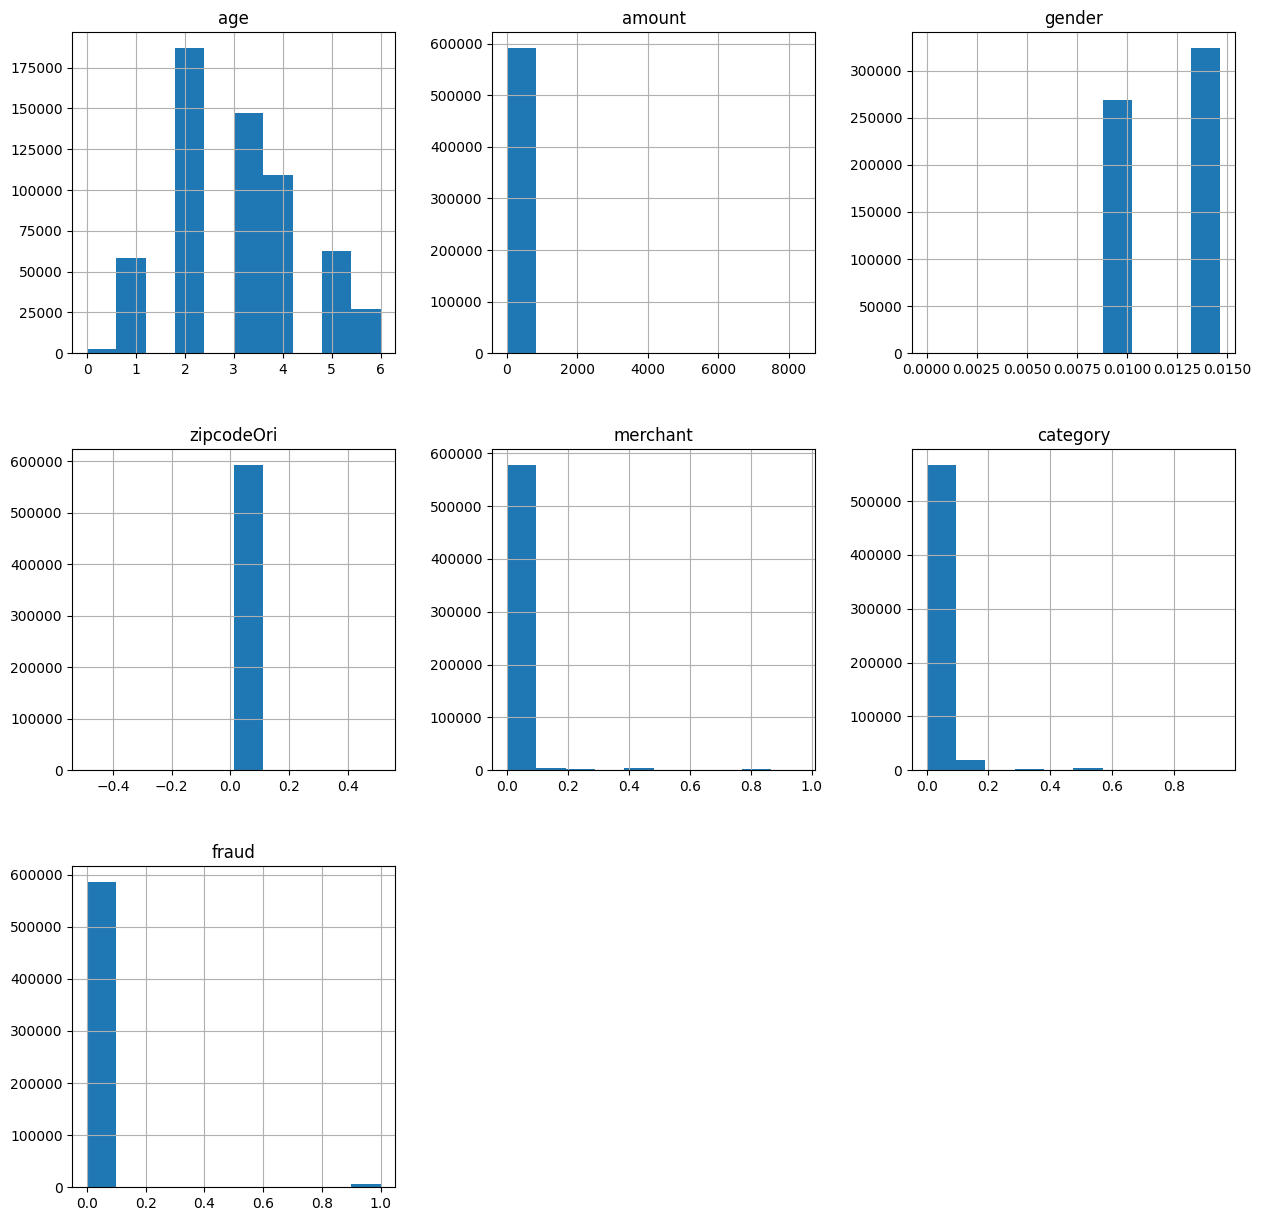

In [17]:
df.hist(figsize=(15,15))

Looking at the one hot encoded columns which I created

In [18]:
boolean_columns = df.select_dtypes(include=bool).columns
for column in boolean_columns:
    print(df[column].value_counts())